<a href="https://colab.research.google.com/github/superoverflow/Notebooks/blob/main/UK_House_Price_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background
* This notebooks analysis UK House Price Index (UKHPI) by going through publicly available data. We will only use 2023 data

# Data source
[price paid data downloads](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads)



# Download data

In [26]:
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2022.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2021.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2020.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2019.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2017.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2016.csv
! wget http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015.csv

--2024-01-28 12:28:17--  http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv
Resolving prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.92.20.108, 52.218.100.212, 52.218.92.76, ...
Connecting to prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)|52.92.20.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv [following]
--2024-01-28 12:28:17--  http://prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv
Resolving prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com (prod2.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com)... 52.92.36.212, 52.218.24.61, 52.92.20.44, 

# Process Data

In [1]:
import pandas as pd

In [3]:
# load data
column_names = [
    'unknown_0',
    'price',
    'transaction_date',
    'post_code',
    'house_type',
    'unknown_1',
    'tenure',
    'unknown_2',
    'unknown_3',
    'street',
    'unknown_4',
    'city',
    'county',
    'unknown_5',
    'unknown_6',
    'unknown_7',
]
df_raw_2023 = pd.read_csv('pp-2023.csv', names=column_names)
# df_raw_2022 = pd.read_csv('pp-2022.csv', names=column_names)
# df_raw_2021 = pd.read_csv('pp-2021.csv', names=column_names)
# df_raw_2020 = pd.read_csv('pp-2020.csv', names=column_names)
# df_raw_2019 = pd.read_csv('pp-2019.csv', names=column_names)
# df_raw_2018 = pd.read_csv('pp-2018.csv', names=column_names)
# df_raw_2017 = pd.read_csv('pp-2017.csv', names=column_names)
# df_raw_2016 = pd.read_csv('pp-2016.csv', names=column_names)
# df_raw_2015 = pd.read_csv('pp-2015.csv', names=column_names)
df_raw = pd.concat([
    df_raw_2023,
    # df_raw_2022,
    # df_raw_2021,
    # df_raw_2020,
    # df_raw_2019,
    # df_raw_2018,
    # df_raw_2017,
    # df_raw_2016,
    # df_raw_2015
])

In [7]:
# clean data
df = df_raw.copy()
df = df[['post_code', 'house_type', 'tenure', 'transaction_date', 'price', 'city', 'county']]
df = df[~df['post_code'].isna()]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

<ipython-input-7-c6f9007f61f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [8]:
# explore data

df[df['post_code'].str.startswith('E16 1')].head(20)

,post_code,house_type,tenure,transaction_date,price,city,county
2599,E16 1TQ,F,L,2023-08-31,390000,LONDON,NEWHAM
4573,E16 1XN,F,L,2023-08-11,500000,LONDON,NEWHAM
10934,E16 1QH,F,L,2023-08-31,590000,LONDON,NEWHAM
52429,E16 1GQ,F,L,2023-02-24,430000,LONDON,NEWHAM
53571,E16 1FQ,F,L,2023-02-28,475000,LONDON,NEWHAM
55131,E16 1YN,F,L,2023-02-13,500000,LONDON,NEWHAM
95535,E16 1AP,F,L,2023-01-27,385000,LONDON,NEWHAM
95984,E16 1BN,F,L,2023-06-01,415000,LONDON,NEWHAM
101456,E16 1YH,F,L,2023-08-23,495000,LONDON,NEWHAM
104670,E16 1LU,F,L,2023-08-25,477000,LONDON,NEWHAM


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('house_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('tenure').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_date']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('transaction_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('house_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='house_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_date']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('transaction_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tenure')):
  _plot_series(series, series_name, i)
  fig.legend(title='tenure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['transaction_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'transaction_date'}, axis=1)
              .sort_values('transaction_date', ascending=True))
  xs = counted['transaction_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('transaction_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('house_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='house_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['transaction_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'transaction_date'}, axis=1)
              .sort_values('transaction_date', ascending=True))
  xs = counted['transaction_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('transaction_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tenure')):
  _plot_series(series, series_name, i)
  fig.legend(title='tenure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tenure'].value_counts()
    for x_label, grp in _df_8.groupby('house_type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('house_type')
_ = plt.ylabel('tenure')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['house_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='price', y='house_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['tenure'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='price', y='tenure', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

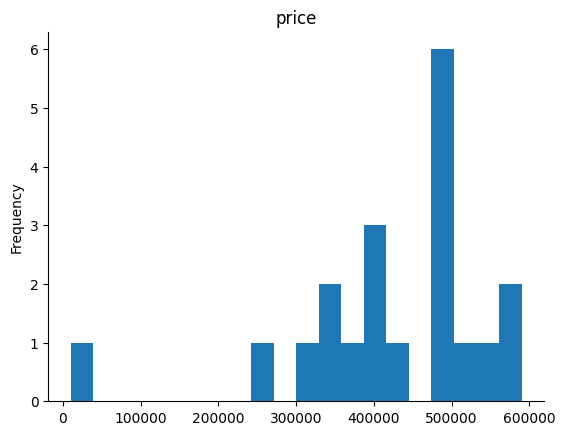

In [9]:
from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)